# Introduction à pandas

Pandas est une librairie qui se base sur numpy et qui permet de manipuler et analyser des données tabulaires issues de csv, table sql ou autres. 

On va retrouver les concepts d'opération vectorisés et mask.

Si il y a une chose où vous devez être à l'aise dans ce cours, c'est pandas. 

Car pas de data : pas d'IA 


L'objet de base qui permet de représenter les données tabulaire est le DataFrame. Pour l'obtenir on a deux métohdes : 

- Le créer soit même 
- Le charger à partir d'une source externe

In [ ]:
# création d'un dataframe soit même à l'aide d'un dictionnaire
import pandas as pd

df = pd.DataFrame({
    'age': [22, 55, 11, 99, -30, -10], 
    "salary": [1000, 1120, 2000, None, 4000, 2000],
    'ville': ['Aix', "Aix", "Paris", "Paris", "Lyon", "Lyon"]
})

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df

,age,salary,ville
0,22,1000.0,Aix
1,55,1120.0,Aix
2,11,2000.0,Paris
3,99,NaN,Paris
4,-30,4000.0,Lyon
5,-10,2000.0,Lyon


In [ ]:
# describe permet d'avoir des statistiques sur les colonnes numériques
df.describe()

,age,salary
count,6.000000,5.000000
mean,24.500000,2024.000000
std,46.539231,1201.199401
min,-30.000000,1000.000000
25%,-4.750000,1120.000000
50%,16.500000,2000.000000
75%,46.750000,2000.000000
max,99.000000,4000.000000


In [ ]:
#df.info() permet d'avoir des informations sur les données manquantes
df.info()# Ici on voit qu'on a une donnée manquante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     6 non-null      int64  
 1   salary  5 non-null      float64
 2   ville   6 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


<AxesSubplot:>

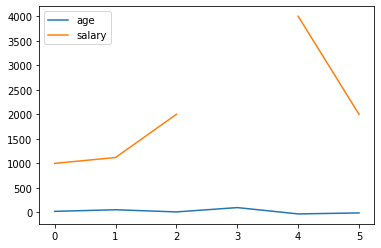

In [ ]:
# Pandas utilise matplotlib pour faire des graphes du dataframe
df.plot() 

In [ ]:
df.columns

Index(['age', 'salary', 'ville'], dtype='object')

In [ ]:
# Selection d'une colonne

column_age = df['age']
type(column_age)

pandas.core.series.Series

In [ ]:
## selection de plusieurs colonnes 

data = df[['age', 'salary']]
type(data)

#On note que si on sélectionne qu'une seule colonne on a une series
# et si on note plusieurs colonnes on a un dataframe à nouveau


pandas.core.frame.DataFrame

## Retour sur les masques

Les masques existent également en pandas et vont nous permetre de selectionne des données qui nous intéressent ou modifier des données spécifiques. Par exemple cela peut nous permettre de nous débarasser des données abhérentes

En pandas les masques se créent en faisant des conditions sur les colonnes 
Une fois qu'on a fait un mask on l'applique sur un dataframe ou une series. Prenons un exemple


In [ ]:
#on peut faire des mask comme en numpy

#Création d'un masque : "je veux tous les lignes où l'age est plus grand que 0"
mask = df['age'] > 0


print(mask)

#application du mask "je veux toutes les données du dataframe original à part les lignes ou l'age est négatif"
df_cleaned = df[mask]
print(df_cleaned)

0     True
1     True
2     True
3     True
4    False
5    False
Name: age, dtype: bool
   age  salary  ville
0   22  1000.0    Aix
1   55  1120.0    Aix
2   11  2000.0  Paris
3   99     NaN  Paris


## Chargement depuis une source de donnée externe

Pandas permet de créer des dataframe à partir de source de données externes : 
- fichier csv
- json
- table sql
- fichier excecl
- etc. 

Voyons comment charger un fichier csv dans pandas. Si on regarde la documentation : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

on voit qu'il y a la méthode read_csv qui permet de faire ça. 

On remarque qu'il y a plein d'options : 
- charger un nombre limité de lignes (nrows)
- dire si il y a des headers
- changer le séparateur de valeur  
- etc

In [ ]:
df = pd.read_csv('house_size_bedrooms_orientation_garden.csv')
df

,size,nb_rooms,garden,orientation,price
0,197.330478,1,0,Sud,-5.156551e+05
1,185.361036,2,0,Sud,9.341416e+05
2,195.113286,3,0,Est,6.894269e+06
3,139.920144,3,1,Ouest,4.307298e+06
4,167.917466,1,0,Nord,1.267890e+06
...,...,...,...,...,...
945,154.659477,3,1,Sud,5.587811e+06
946,276.866562,1,1,Sud,-1.349292e+05
947,184.679199,1,1,Ouest,2.839957e+06
948,82.281477,1,0,Nord,3.114215e+06


In [ ]:
mask_room_2 = df['bedrooms'] == 2
df[mask_room_2]

,size,bedrooms,orientation
3,55.728780,2,North
5,77.714337,2,West
13,59.595308,2,North
15,142.483424,2,North
29,101.320632,2,North
30,82.156832,2,West
31,83.860972,2,South
32,40.537405,2,West
35,43.758943,2,East
38,104.330867,2,East


## Création de colonne et mise à jour de données

On peut également créer de nouvelles colonnes ou mettre à jour des données dans un
dataframe pandas. On notera que les opérations sont vectorisées (pas besoin de boucle) dans ce cas également

In [ ]:
df['size_au_carre'] = df['size'] ** 2
df

KeyError: 'size'

In [ ]:
#df['log_size'] = np.log(1 + df['size'])
df

,size,bedrooms,orientation,nom_nouvelle_col,size_au_carre,log_size
0,131.672450,1,South,4,17337.633972,4.887883
1,179.464732,1,East,4,32207.590018,5.195535
2,122.635992,3,East,4,15039.586634,4.817342
3,55.728780,2,North,4,3105.696909,4.038282
4,79.907682,1,South,4,6385.237574,4.393309
5,77.714337,2,West,4,6039.518131,4.365825
6,114.381967,3,North,4,13083.234318,4.748248
7,107.921679,3,North,4,11647.088707,4.690629
8,127.863334,1,West,4,16349.032193,4.858752
9,66.212258,1,North,4,4384.063065,4.207856


## iloc 

Supposons que l'ont veuille modifier un sous ensemble d'un dataframe après avoir fait un mask. 
On pourrait avoir envie de faire la méthode suivante : 





In [ ]:
import pandas as pd

df = pd.DataFrame({
    'age': [22, 55, 11, 99, -30, -10], 
    "salary": [1000, 1120, 2000, None, 4000, 2000],
    'ville': ['Aix', "Aix", "Paris", "Paris", "Lyon", "Lyon"]
})


mask = df['age'] < 0
df[mask]['age'] = 0

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df

,age,salary,ville
0,22,1000.0,Aix
1,55,1120.0,Aix
2,11,2000.0,Paris
3,99,NaN,Paris
4,-30,4000.0,Lyon
5,-10,2000.0,Lyon


On voit que pandas affiche un warning et que le dataframe n'est pas modifié ! 

Pour faire ce que l'on veut il faut utiliser l'attribut loc

In [ ]:
df.loc[mask, 'age'] = 0
df

,age,salary,ville
0,22,1000.0,Aix
1,55,1120.0,Aix
2,11,2000.0,Paris
3,99,NaN,Paris
4,0,4000.0,Lyon
5,0,2000.0,Lyon


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25ad01f7-ec4b-4ac8-bce6-a3745ef02c96' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>